# SVM (Support Vector Machine)
- ### Iris 데이터

In [8]:
import numpy as np
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()

In [10]:
X, y = iris.data, iris.target

### 그래프를 그려 보기 위해 
- #### 전체 4개의 특성 중, 앞의 2개의 특성만 사용

In [11]:
X2 = X[:, :2]

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'Sepal width')

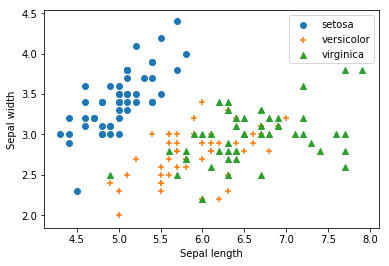

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']

for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
    
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

## 이진 분류 문제로 변환
- setosa와 setosa가 아닌 것으로 구분
- 즉, 레이블이 0, 1, 2가 아니라 0, 1 두 개만으로 변환

In [14]:
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다

y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.7)

Text(0, 0.5, 'Sepal width')

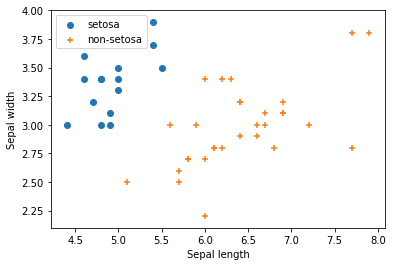

In [16]:
markers = ['o', '+', '^']

for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
    
binary_names = ['setosa', 'non-setosa']

plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [19]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_

In [21]:
a, b, c

(15.239461727428921, -13.195939042153158, array([-40.05809383]))

In [22]:
clf.score(X_test, y_test)

1.0

## SVM
- 마진을 최대화 (maximizing the margin)
- 즉, 결정경계 주변에 있는 샘플들과 결정경계와의 거리(margin)를 최대화하는 방향으로 결정 경계 설정
- 그래야 일반화 성능이 좋아진다

- kernel : linear, poly, rbf, sigmoid, precomputed or a callable
- C : Error 항의 penalty parameter
    - 손실 함수 = C * (에러항) + 규제항
    - 즉, C값이 커지면 --> 분류 정확도(훈련 데이터) high, 대신 margin 줄어든다
    - 따라서 Noise 많은 데이터의 경우, C 값을 낮춰서 마진을 늘려지도록 하는 것이 좋다
- gamma : rbf 커널에서 하나의 훈련 샘플이 얼마나 멀리 영향이 미치게 할 것인가 결정
    - gamma 가 커지면, 가깝게 영향

### 결정 경계
- ax1 + bx2 + c >= 0
- x2 >= - a/b x1 - c/b
- SVC : a -> w[0], b -> w[1], c -> v

Support vector 생성
- 각 class 별(column)로 결정 경계에 가장 가까운 데이터 집합

In [39]:
from sklearn.svm import SVC

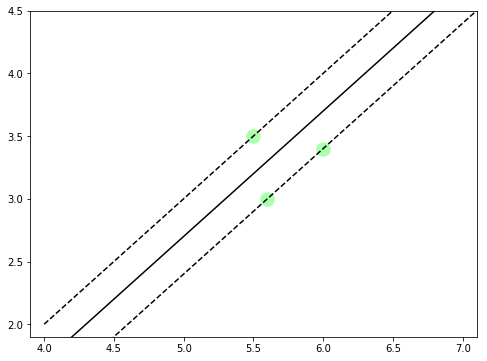

In [40]:
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_train, y_train)

plt.figure(figsize=(8,6)) 
plt.xlim(3.9,7.1) 
plt.ylim(1.9,4.5)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]
XX = np.linspace(4, 8, 30)

decision_boundary = -w[0]/w[1] * XX - v/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin 
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAFFAA') 

plt.plot(XX, decision_boundary, "k-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")

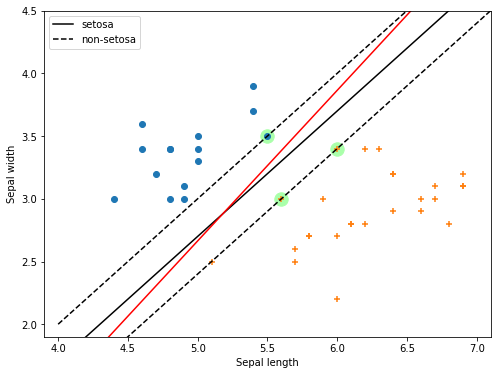

In [41]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_train, y_train)

plt.figure(figsize=(8,6)) 
plt.xlim(3.9,7.1) 
plt.ylim(1.9,4.5)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]
XX = np.linspace(4, 8, 30)

decision_boundary = -w[0]/w[1] * XX - v/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin 
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAFFAA') 


plt.plot(XX, decision_boundary, "k-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")

markers = ['o', '+', '^'] 
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i] 
    plt.scatter(xs, ys, marker=markers[i])
    
binary_names = ['setosa', 'non-setosa'] 
plt.legend(binary_names)
plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")

# 선형분류 결정 경계선
plt.plot(XX, (-a/b * XX + -c/b), "r-")

### SVM은 선형 모델보다 일반화된 모델을 만들고 과대적합을 피하게 된다

In [42]:
svm_clf.score(X_test, y_test)

1.0

In [43]:
svs

array([[5.5, 3.5],
       [6. , 3.4],
       [5.6, 3. ]])

## 커널 기법
- ### 유방암 예제

In [23]:
from sklearn.datasets import load_breast_cancer

In [24]:
cancer = load_breast_cancer() 

In [25]:
X = cancer.data
y = cancer.target

In [26]:
X.shape, y.shape

((569, 30), (569,))

- Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
- probability : Whether to enable probability estimates

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer.target)

In [30]:
from sklearn.svm import SVC
# from sklearn.multiclass import OneVsRestClassifier

# classifier = OneVsRestClassifier(SVC(kernel='rbf', C=1000, gamma=0.1,probability=True))
# classifier = classifier.fit(X_train, y_train)
# classifier.score(X_test, y_test)

classifier = SVC(kernel='rbf', C=1000, gamma=0.1, probability=True)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.6293706293706294

In [52]:
classifier = SVC(kernel='rbf', C=0.1, gamma=0.1, probability=True)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.6293706293706294

## 선형 분류의 경우

In [13]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.9090909090909091

In [14]:
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)

print("SVM score:", svm_clf.score(X_test, y_test))

SVM score: 0.9440559440559441
